# Data Analysis and Preprocessing

## Handle Missing Values

In [88]:
import pandas as pd

creditcard_data = pd.read_csv('../data/creditcard.csv')
# Assuming fraud_data.csv and ip_address_data.csv are the other datasets
fraud_data = pd.read_csv('../data/Fraud_Data.csv')
ip_data = pd.read_csv('../data/IpAddress_to_Country.csv')


In [89]:
# Check for missing values
print(fraud_data.isnull().sum())
print(ip_data.isnull().sum())
print(creditcard_data.isnull().sum())


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## Data Cleaning

In [90]:

# Remove duplicates
fraud_data = fraud_data.drop_duplicates()
ip_data = ip_data.drop_duplicates()
creditcard_data = creditcard_data.drop_duplicates()

In [91]:
# Correct data types
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])
fraud_data['age'] = fraud_data['age'].astype(int)
fraud_data['purchase_value'] = fraud_data['purchase_value'].astype(float)

## Exploratory Data Analysis (EDA)

### Univariate Analysis

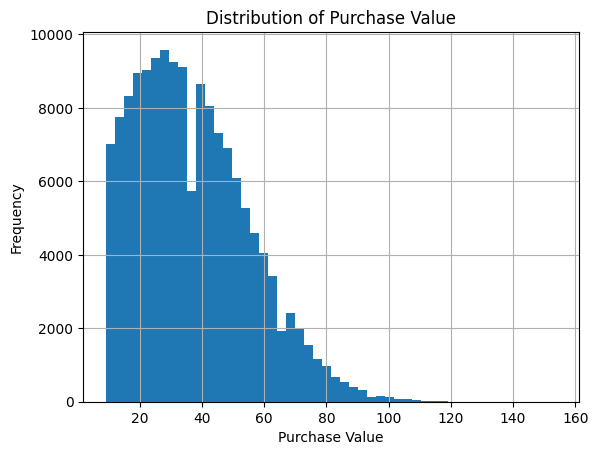

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis
fraud_data['purchase_value'].hist(bins=50)
plt.title('Distribution of Purchase Value')
plt.xlabel('Purchase Value')
plt.ylabel('Frequency')
plt.show()




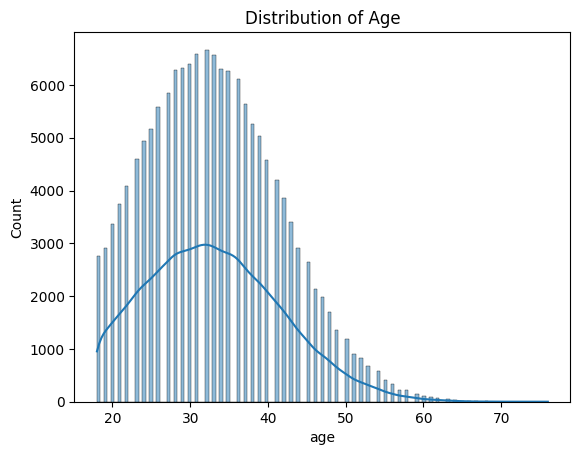

In [93]:
# Univariate analysis for 'age'
sns.histplot(fraud_data['age'], kde=True)
plt.title("Distribution of Age")
plt.show()

### Bivariate Analysis

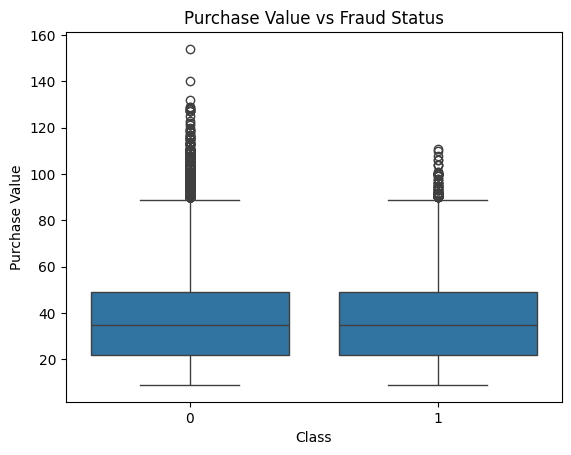

In [94]:
# Bivariate analysis
sns.boxplot(x='class', y='purchase_value', data=fraud_data)
plt.title('Purchase Value vs Fraud Status')
plt.xlabel('Class')
plt.ylabel('Purchase Value')
plt.show()

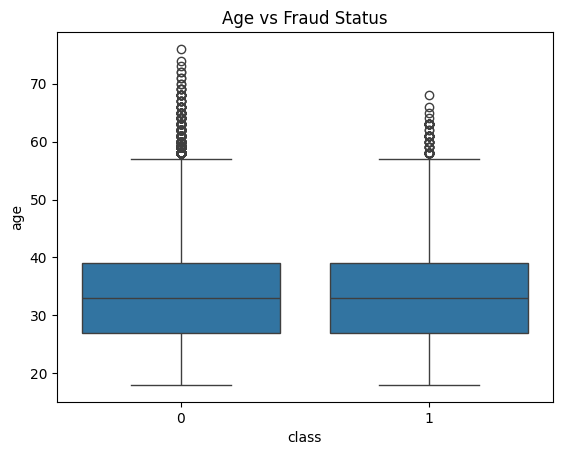

In [95]:

# Bivariate analysis between age and class (fraud/non-fraud)
sns.boxplot(x='class', y='age', data=fraud_data)
plt.title("Age vs Fraud Status")
plt.show()


## Merge Datasets for Geolocation Analysis

In [96]:

# Convert IP address to integer function
def ip_to_int(ip):
    try:
        # Convert IP address to integer
        return int(ip)
    except ValueError:
        # Return None for invalid IPs
        return None

# Apply the function to convert IP addresses to integers
fraud_data['ip_address_int'] = fraud_data['ip_address'].apply(ip_to_int)

# Ensure IP address ranges in ip_data are integers
ip_data['lower_bound_ip_address'] = ip_data['lower_bound_ip_address'].astype(int)
ip_data['upper_bound_ip_address'] = ip_data['upper_bound_ip_address'].astype(int)

# Function to find the country for a given IP address
def find_country(ip_int, ip_data):
    row = ip_data[(ip_data['lower_bound_ip_address'] <= ip_int) & (ip_data['upper_bound_ip_address'] >= ip_int)]
    if not row.empty:
        return row['country'].values[0]
    else:
        return 'Unknown'

# Apply the function to find the country for each IP address
fraud_data['country'] = fraud_data['ip_address_int'].apply(lambda x: find_country(x, ip_data))

In [97]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_address_int,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,732758368,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,350311387,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15.0,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,2621473820,Unknown
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44.0,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,3840542443,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39.0,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,415583117,United States


In [98]:
# Merge fraud_data with ip_data
# merged_data = pd.merge(
#     fraud_data,
#     ip_data,
#     left_on='ip_address_int',
#     right_on='lower_bound_ip_address',
#     how='left'
# )

In [99]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_address_int,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34.0,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,732758368,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16.0,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,350311387,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15.0,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,2621473820,Unknown
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44.0,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,3840542443,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39.0,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,415583117,United States


## Feature Engineering

### Transaction Frequency and Velocity

In [100]:
# Transaction frequency per user
fraud_data['transaction_freq'] = fraud_data.groupby('user_id')['user_id'].transform('count')

# Calculate transaction velocity (time between signup and purchase)
fraud_data['transaction_velocity'] = (fraud_data['purchase_time'] - fraud_data['signup_time']).dt.total_seconds() / 3600  # in hours

# Check the new features
print(fraud_data[['user_id', 'transaction_freq', 'transaction_velocity']].head())



   user_id  transaction_freq  transaction_velocity
0    22058                 1           1251.856111
1   333320                 1              4.984444
2     1359                 1              0.000278
3   150084                 1            136.690278
4   221365                 1           1211.516944


### Time-Based Features

In [101]:
# Extract hour of day from the purchase time
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour

# Extract day of the week from the purchase time
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek

# Check the new time-based features
print(fraud_data[['purchase_time', 'hour_of_day', 'day_of_week']].head())


        purchase_time  hour_of_day  day_of_week
0 2015-04-18 02:47:11            2            5
1 2015-06-08 01:38:54            1            0
2 2015-01-01 18:52:45           18            3
3 2015-05-04 13:54:50           13            0
4 2015-09-09 18:40:53           18            2


## Normalization and Scaling

In [102]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numerical_features = ['purchase_value', 'age', 'transaction_freq', 'transaction_velocity']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
fraud_data[numerical_features] = scaler.fit_transform(fraud_data[numerical_features])


In [103]:
# Check the scaled features
print(fraud_data[numerical_features].head())

   purchase_value       age  transaction_freq  transaction_velocity
0       -0.160204  0.679914               0.0             -0.136057
1       -1.142592  2.304476               0.0             -1.571877
2       -1.197169  2.304476               0.0             -1.577617
3        0.385567  0.911994               0.0             -1.420213
4        0.112681  1.376155               0.0             -0.182509


## Encode Categorical Features

In [104]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
encoder = LabelEncoder()

# Encode 'source'
fraud_data['source_encoded'] = encoder.fit_transform(fraud_data['source'])

# Encode 'browser'
fraud_data['browser_encoded'] = encoder.fit_transform(fraud_data['browser'])

# Encode 'sex'
fraud_data['sex_encoded'] = encoder.fit_transform(fraud_data['sex'])

# Check the encoded features
print(fraud_data[['source', 'source_encoded', 'browser', 'browser_encoded', 'sex', 'sex_encoded']].head())


  source  source_encoded browser  browser_encoded sex  sex_encoded
0    SEO               2  Chrome                0   M            1
1    Ads               0  Chrome                0   F            0
2    SEO               2   Opera                3   M            1
3    SEO               2  Safari                4   M            1
4    Ads               0  Safari                4   M            1


In [105]:
fraud_data.to_csv('../data/processed/fraud_data.csv')

In [106]:
creditcard_data.to_csv('../data/processed/creditcard_data.csv')